In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Dataset upload as dataframem

Dataset from Kaggle https://www.kaggle.com/datasets/uciml/mushroom-classification?select=mushrooms.csv

In [65]:
df = pd.read_csv('../../data/mushrooms.csv')

In [66]:
df

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

To understand target data percentage

In [67]:
df['class'].value_counts(normalize=True)

e    0.517971
p    0.482029
Name: class, dtype: float64

Dataframe attribute before running training

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

1. Label encording for categorical data
2. Feature names and label name
3. Train/Test dataset split
4. Loading model and training
5. Prediction 

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
encorder = LabelEncoder()

In [71]:
for col_name in df.columns:
    
   df[col_name] =  encorder.fit_transform(df[col_name])

In [72]:
feature_names = df.columns[1:].to_list()
feature_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [73]:
label_name = 'class'
label_name

'class'

In [74]:
X = df[feature_names]
X

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1           4            0  ...   
1                0          0           4            0  ...   
2                0          0           5            0  ...   
3                0          1           5            0  ...   
4                1          0           4            1  ...   
...            ...        ...         ...          ...  ...   
8119             0          0          11            0  ...   
8120             0          0          11            0  ...   
8121             0          0           5            0  ...   
8122             0          1           0            1  ...   
8123             0          0          11            0  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 22 columns]

In [75]:
y = df[[label_name]]
y

class
0         1
1         0
2         0
3         1
4         0
...     ...
8119      0
8120      0
8121      0
8122      1
8123      0

[8124 rows x 1 columns]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model = RandomForestClassifier(random_state=2022)

In [80]:
model.fit(X_train, y_train)

C:\Users\sakam\AppData\Local\Temp/ipykernel_35632/180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(random_state=2022)

In [81]:
y_predict = model.predict(X_test)

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [83]:
accuracy_score(y_test, y_predict)

1.0

In [84]:
result = classification_report(y_test,y_predict )
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       827
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<AxesSubplot:>

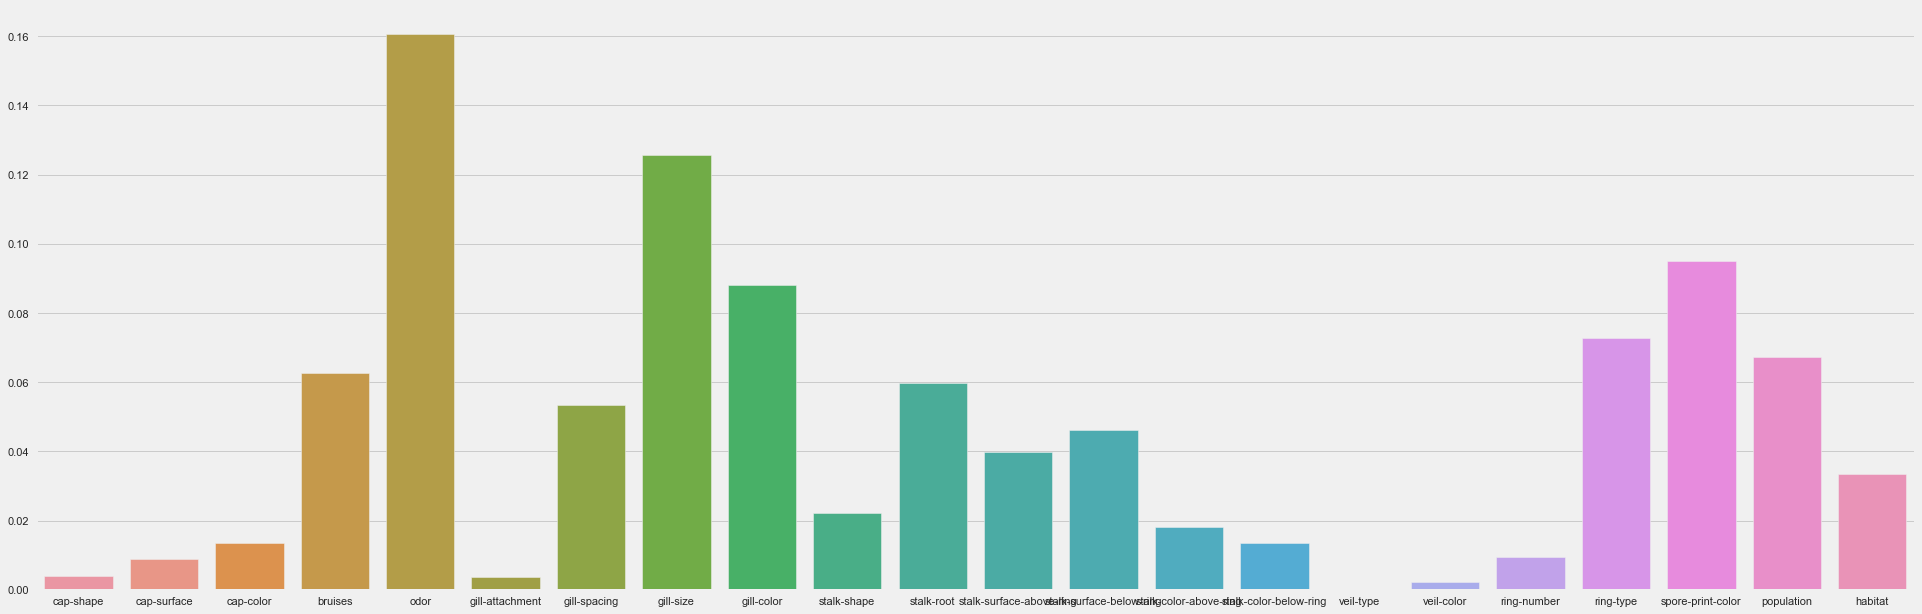

In [85]:
plt.figure(figsize=(30,10))
sns.barplot(x=feature_names, y=model.feature_importances_)

To analyze feature correlations with label/target data

<AxesSubplot:>

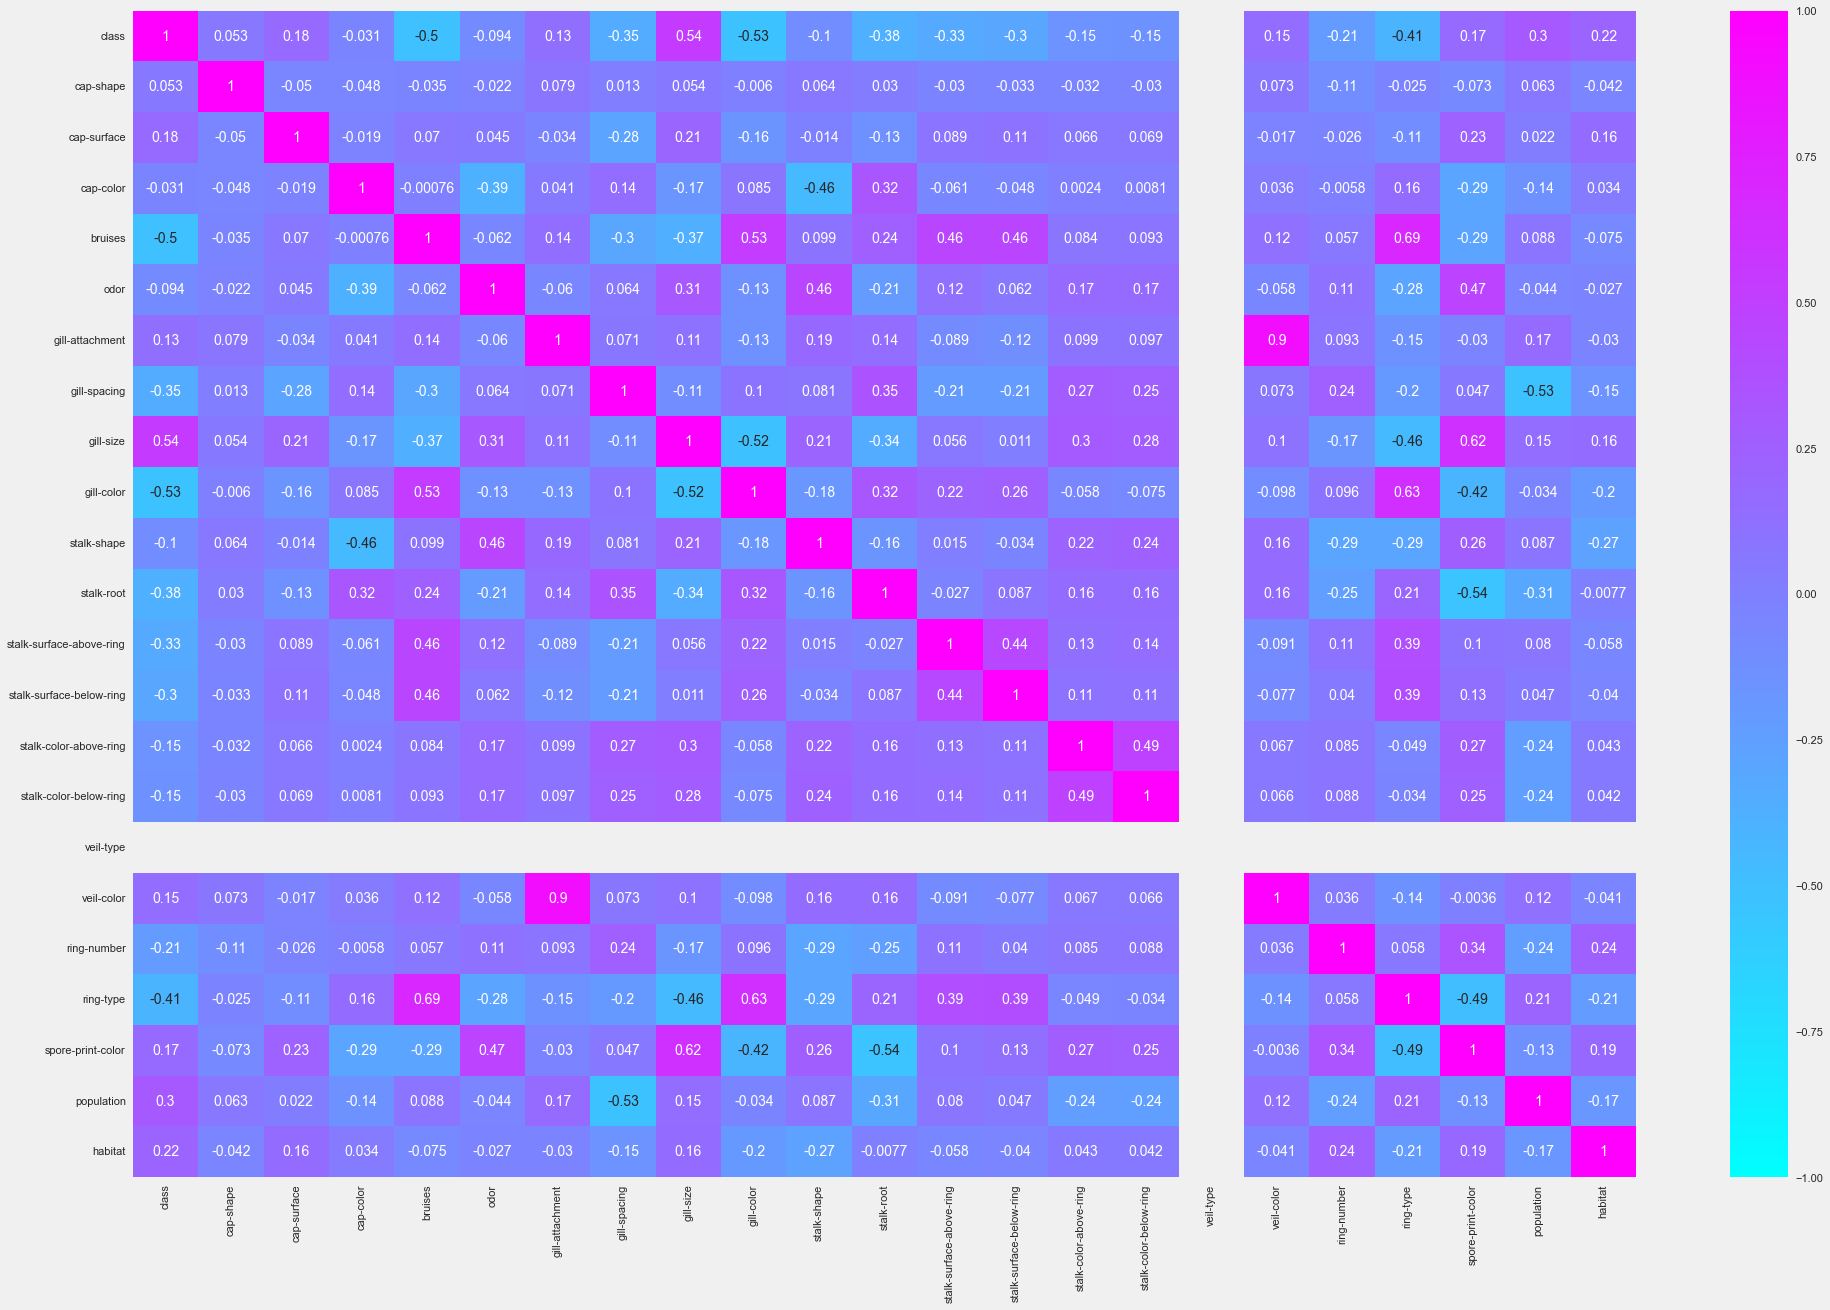

In [86]:
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, cmap='cool')

In [87]:
from autoviz.AutoViz_Class import AutoViz_Class

Shape of your Data Set loaded: (8124, 23)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


  Printing upto 30 columns max in each category:
    Numeric Columns : []
    Integer-Categorical Columns: ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: ['veil-type']
    22 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['veil-type']

################ Binary_Classification problem #####################
   Columns to dele

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1           4            0  ...   
1                0          0           4            0  ...   
2                0          0           5            0  ...   
3                0          1           5            0  ...   
4                1          0           4            1  ...   
...            ...        ...         ...          ...  ...   
8119             0          0          11            0  ...   
8120             0          0          11            0  ...   
8121             0          0           5            0  ...   
8122             0          1           0            1  ...   
8123             0          0          11            0  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-color  ring-number  ring-type  \
0                          7           2            1          4   
1                          7           2            1          4   
2                          7           2            1          4   
3                          7           2            1          4   
4                          7           2            1          0   
...                      ...         ...          ...        ...   
8119                       5           1            1          4   
8120                       5           0            1          4   
8121                       5           1            1          4   
8122                       7           2            1          0   
8123                       5           1            1          4   

      spore-print-color  population  habitat  class  
0                     2           3        5      1  
1                     3           2        1      0  
2                     3           2        3      0  
3                     2           3        5      1  
4                     3           0        1      0  
...                 ...         ...      ...    ...  
8119                  0           1        2      0  
8120                  0           4        2      0  
8121                  0           1        2      0  
8122                  7           4        2      1  
8123                  4           1        2      0  

[8124 rows x 22 columns]

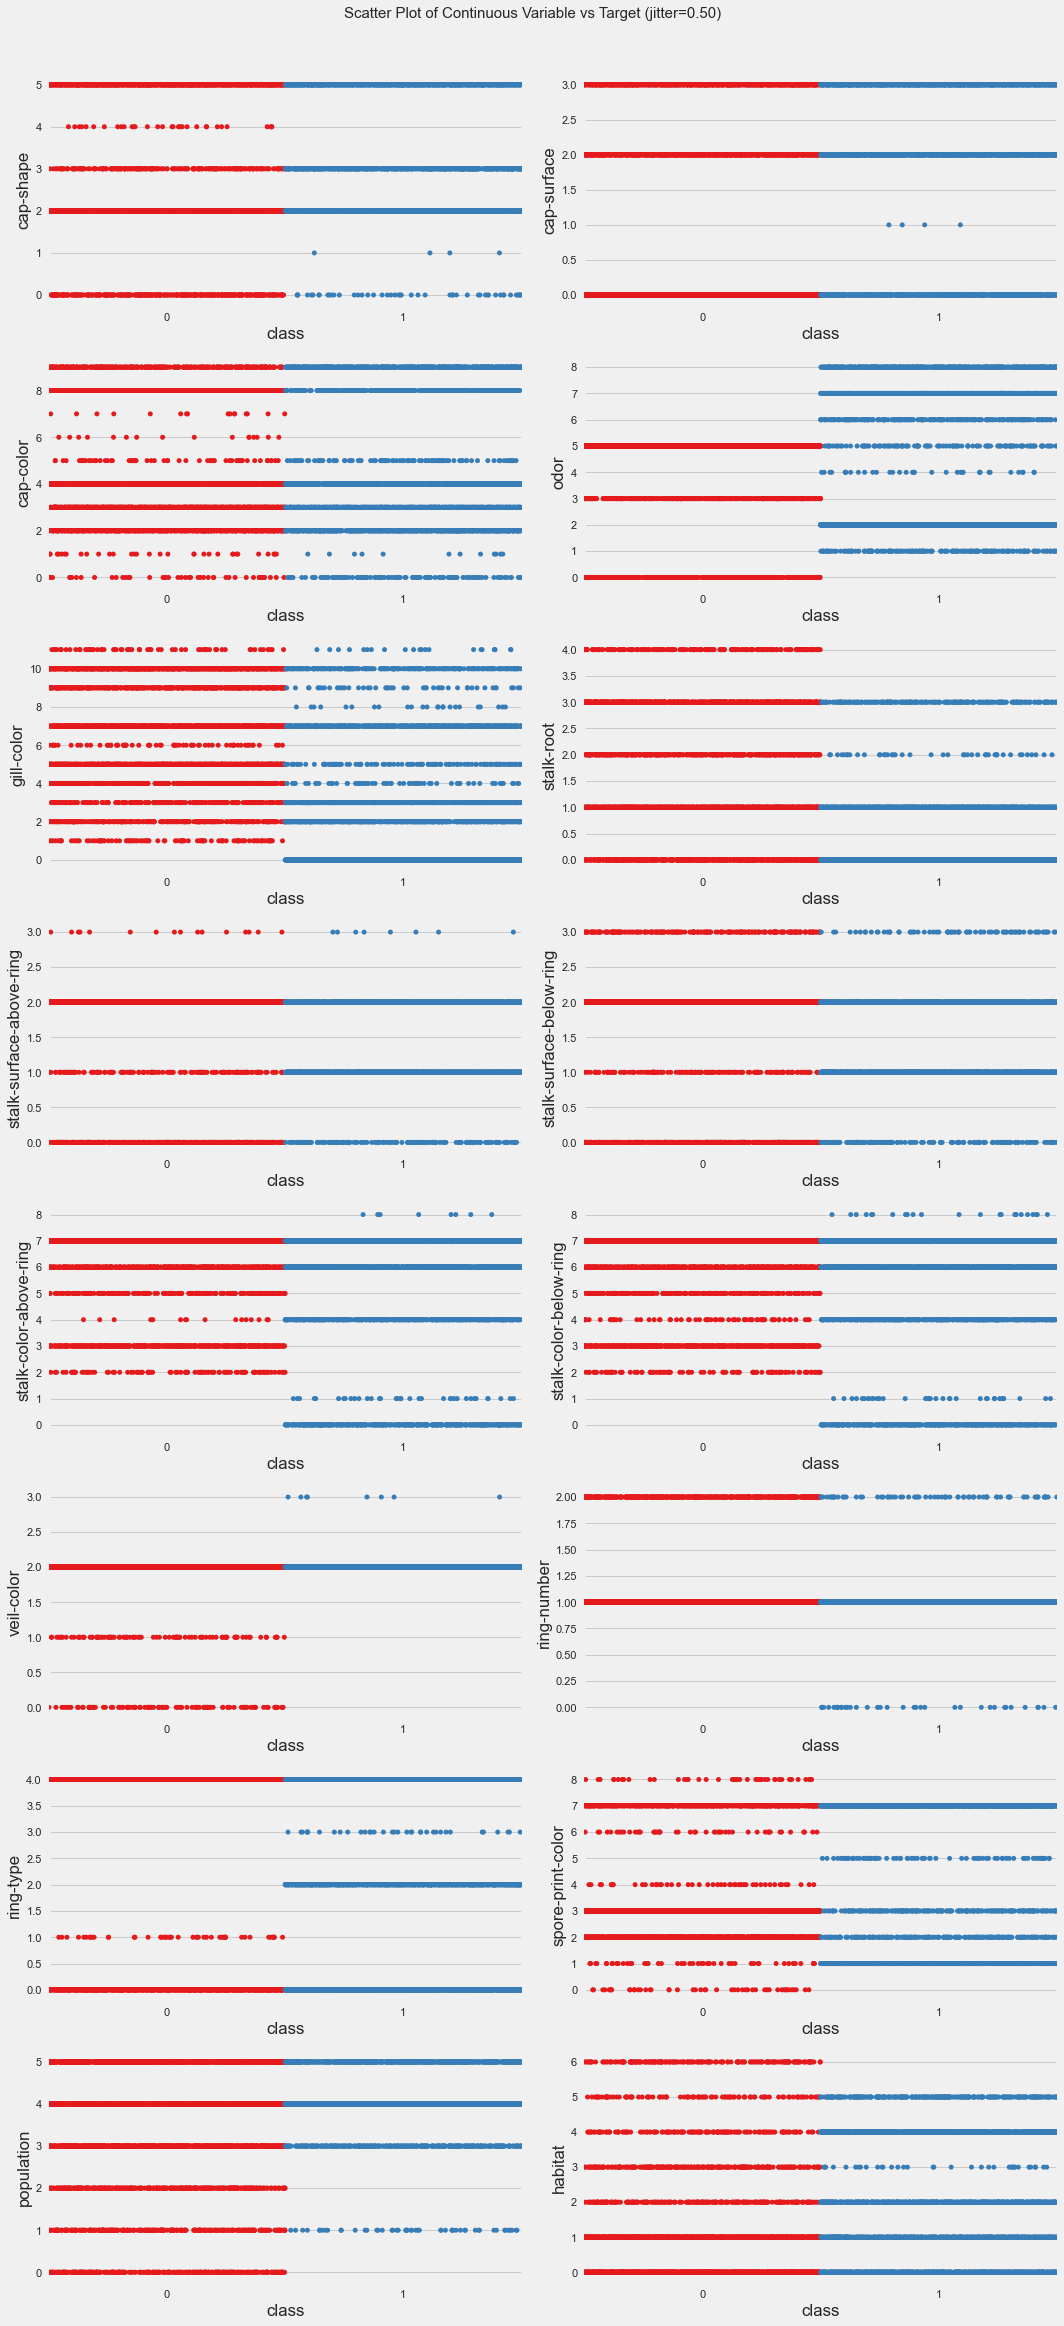

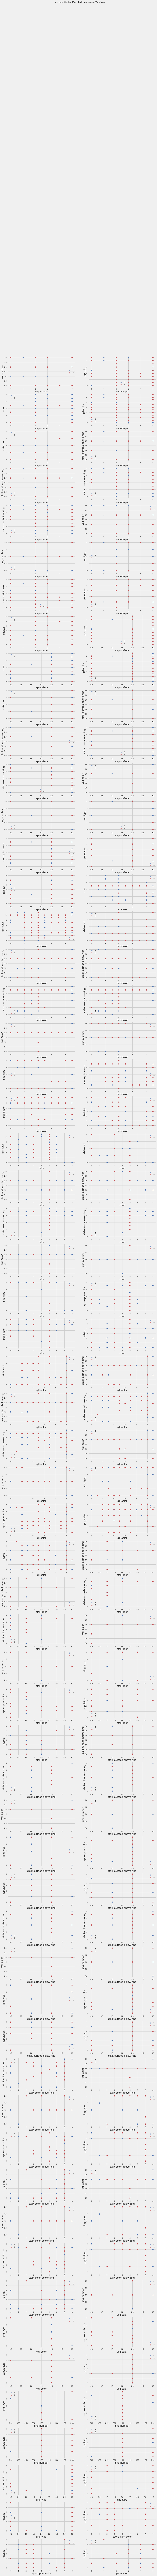

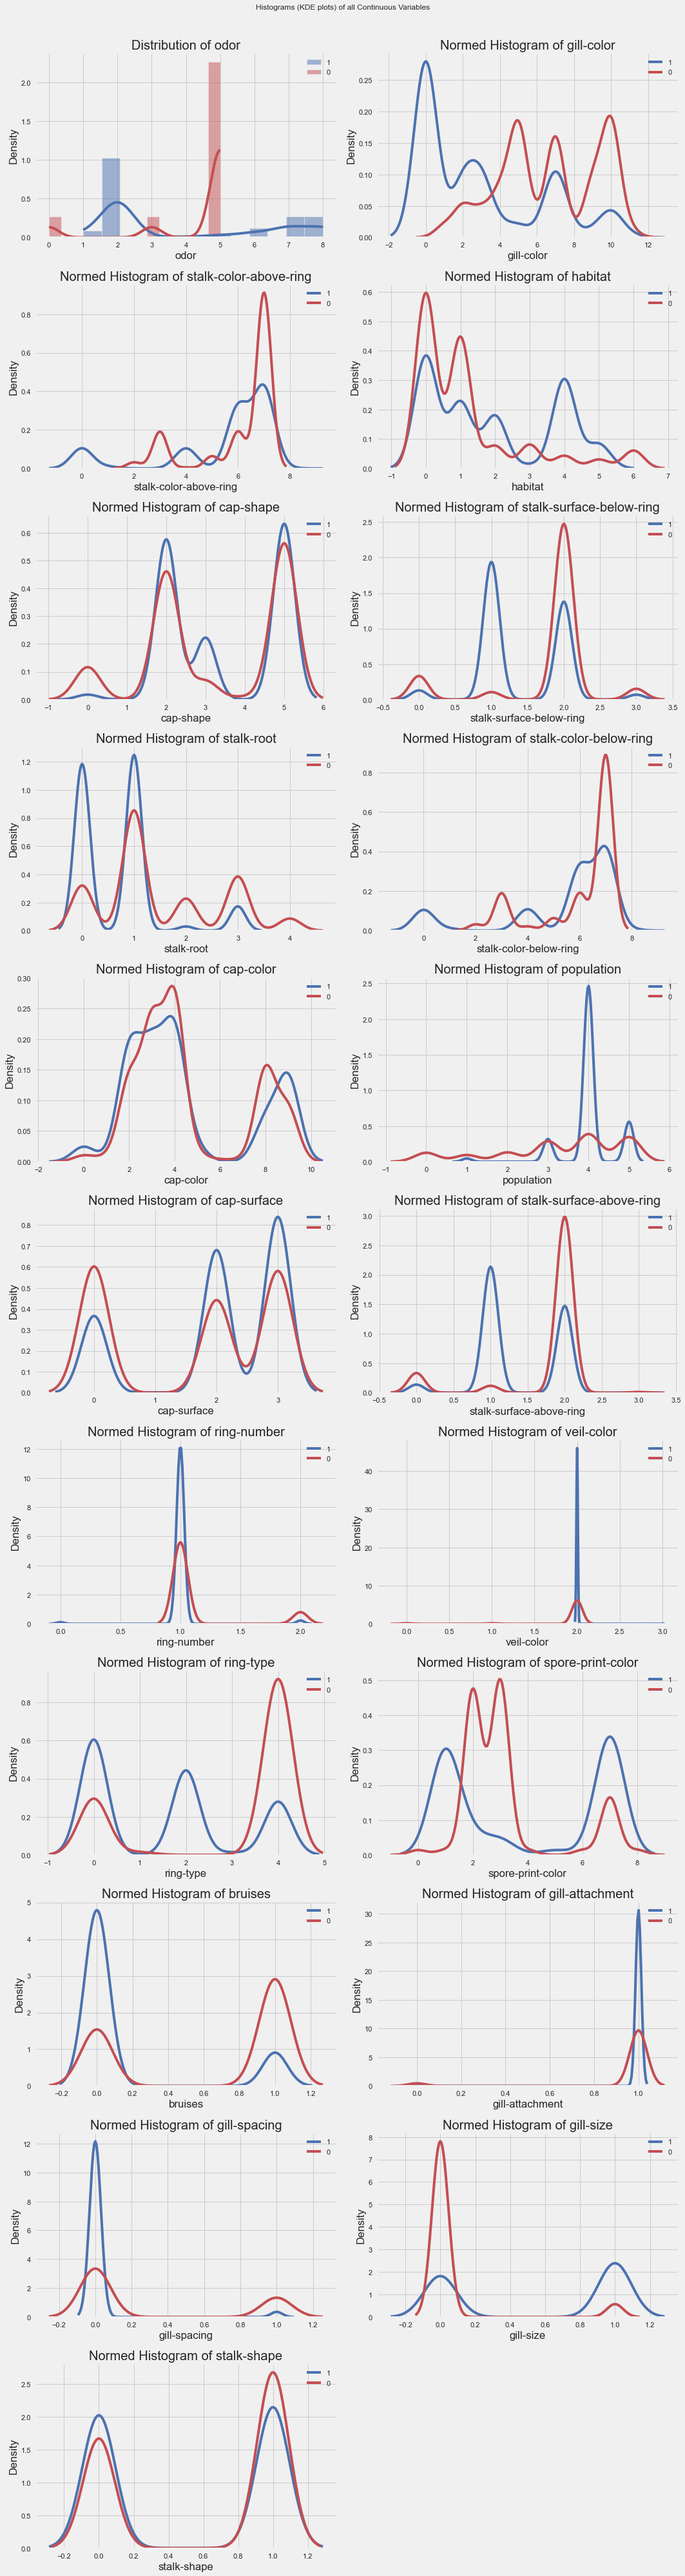

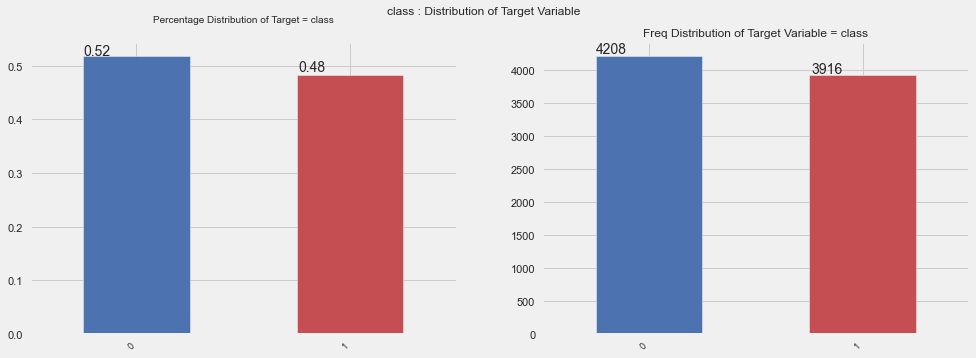

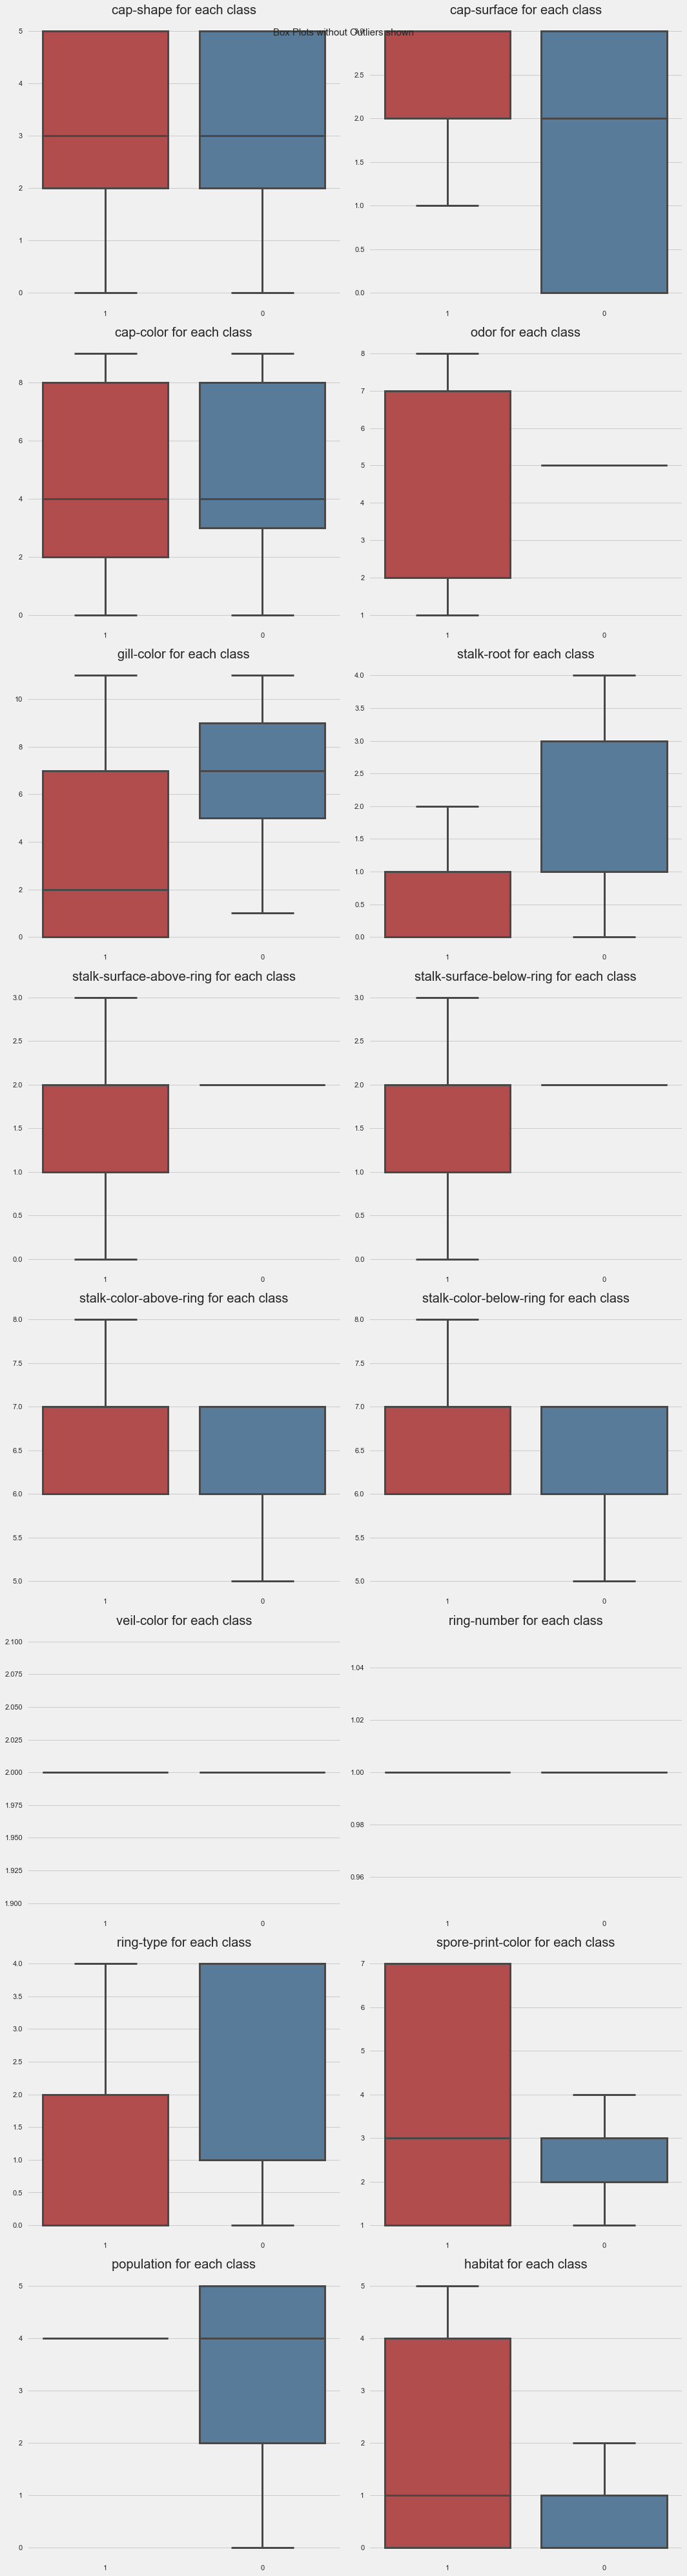

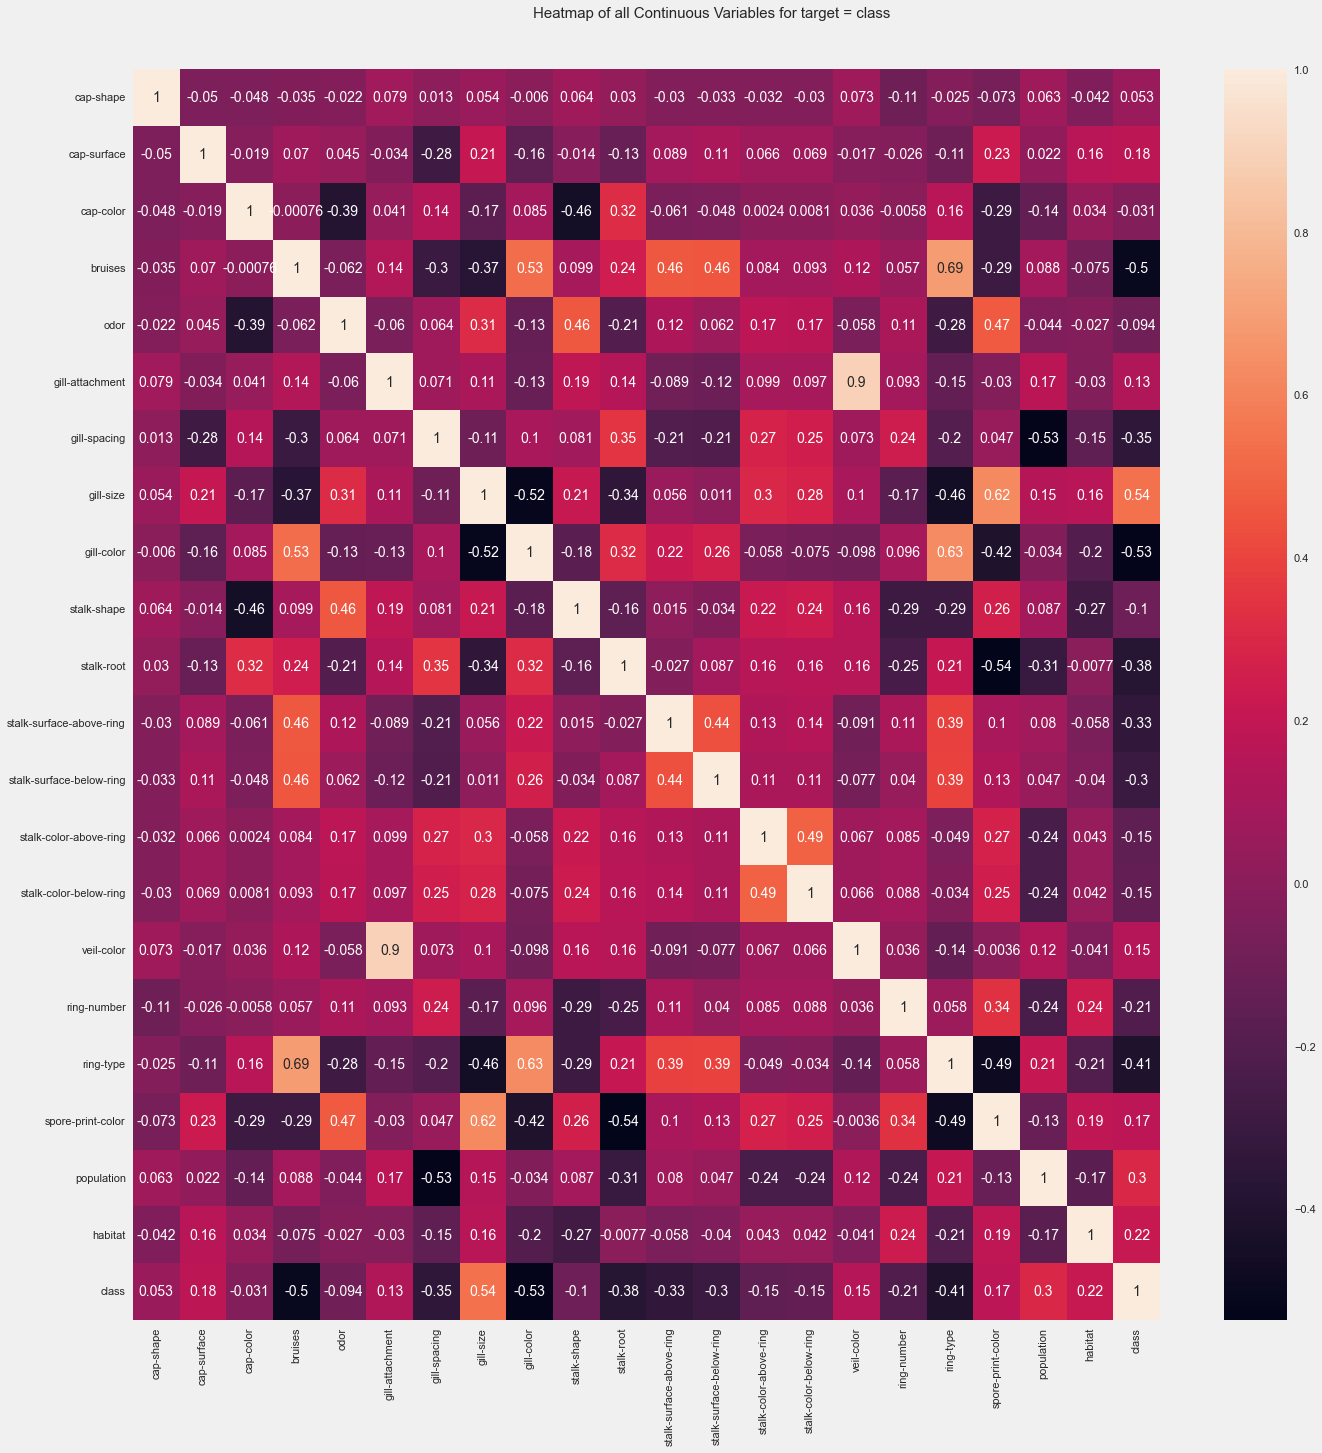

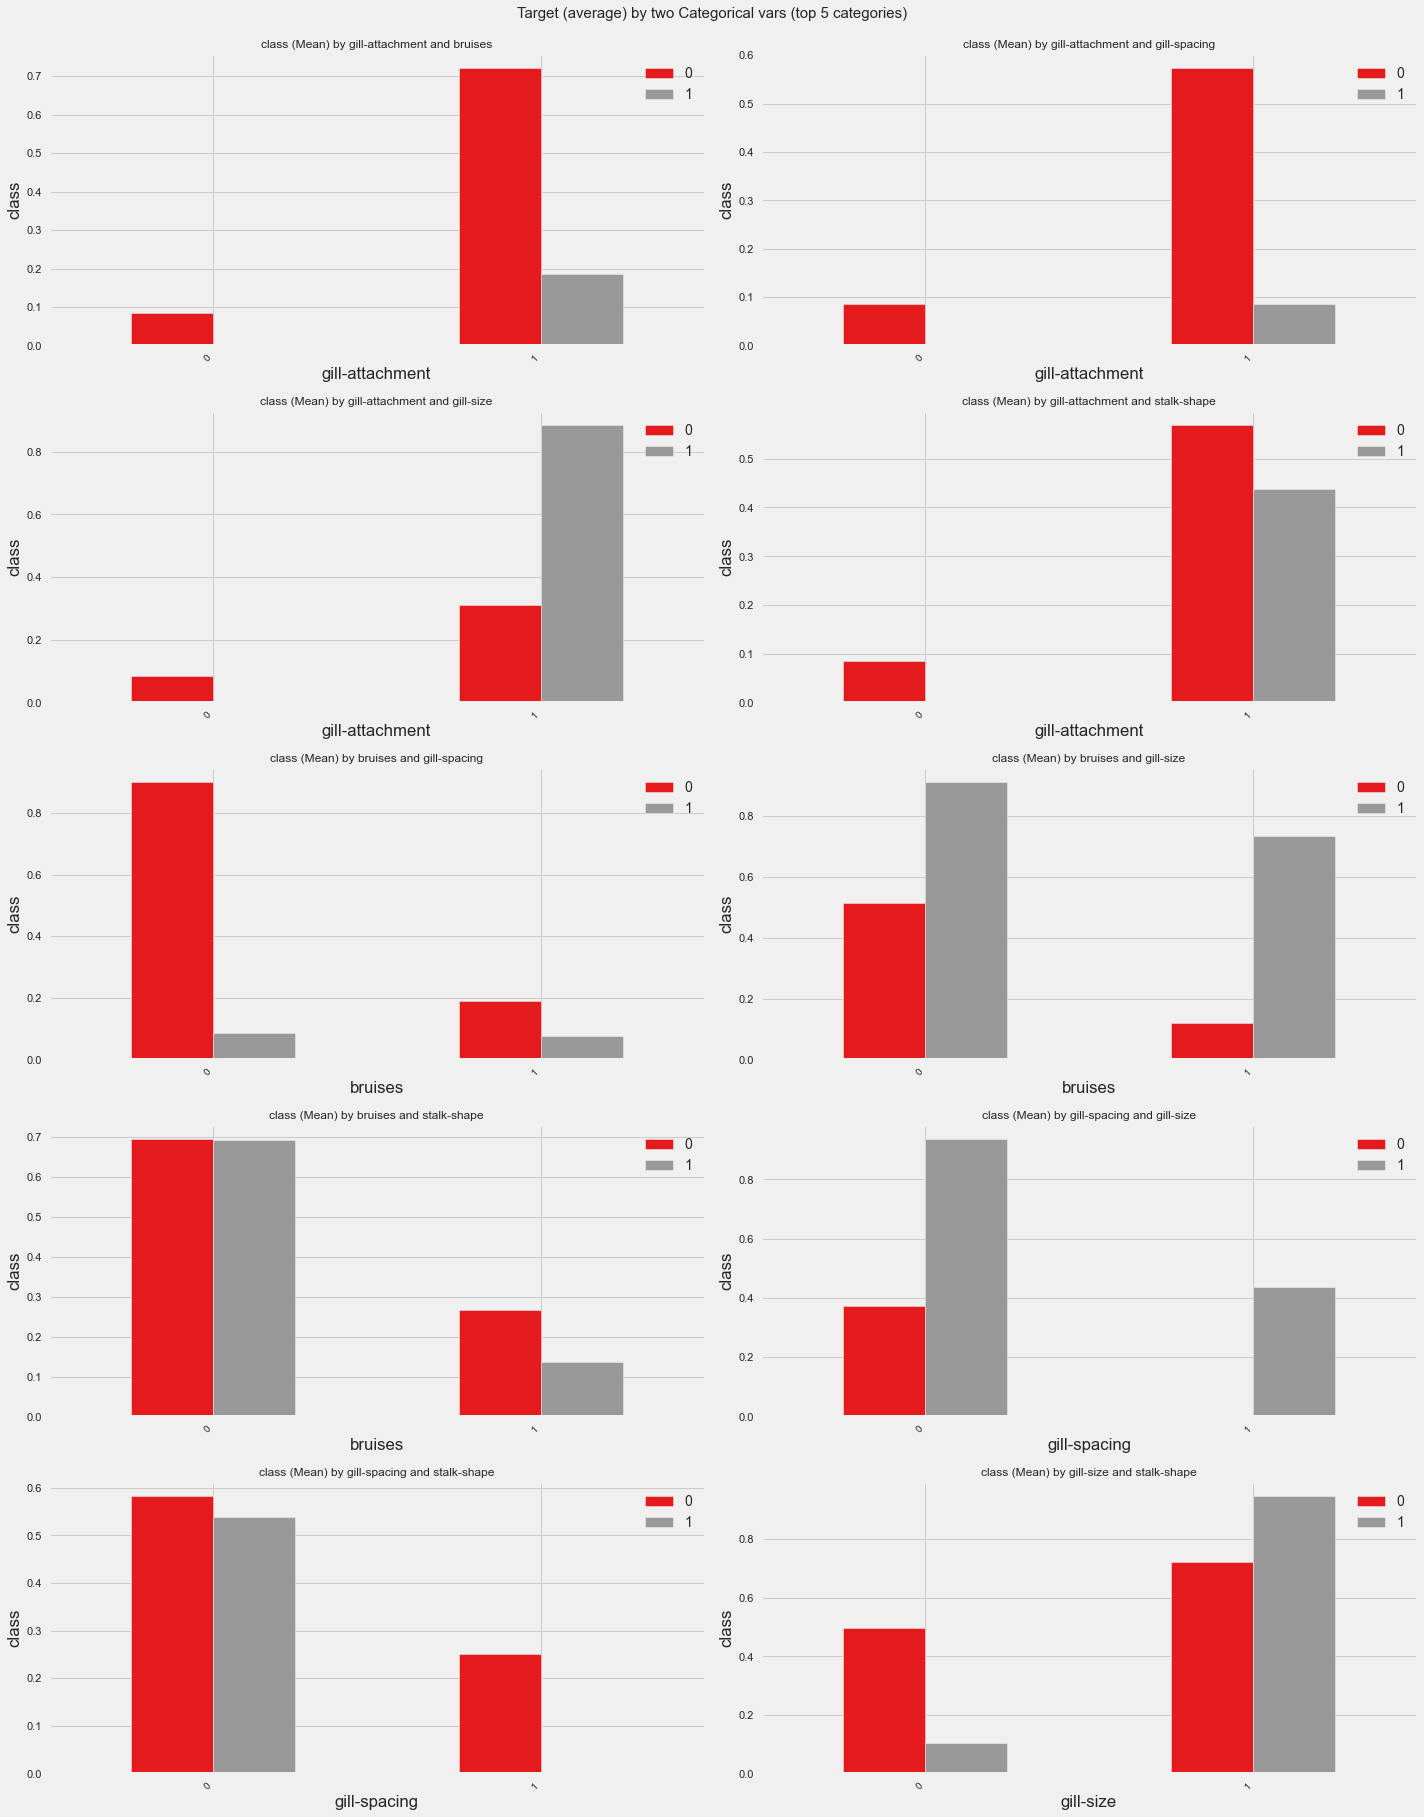

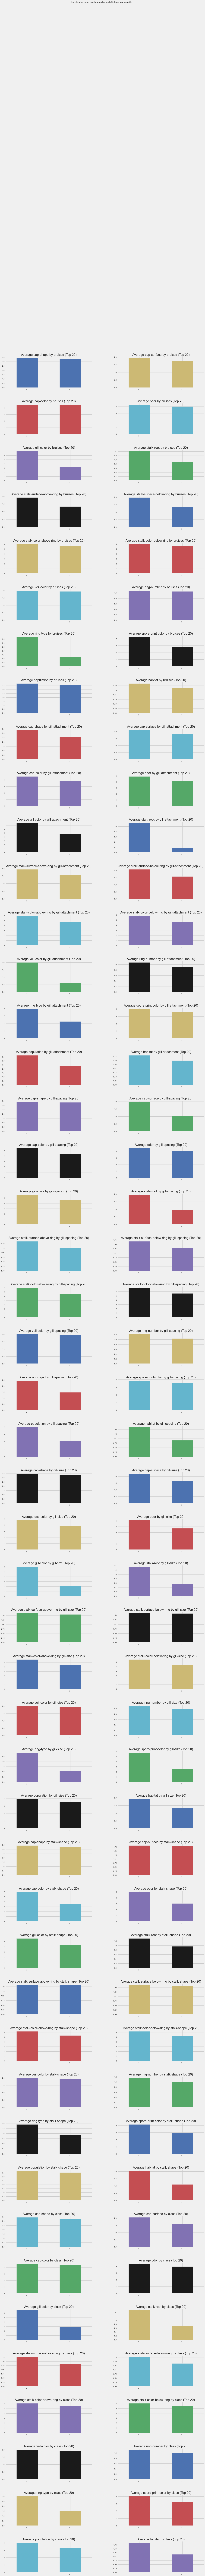

In [88]:
AV = AutoViz_Class()
AV.AutoViz(filename='',
          dfte=df,
          depVar='class',
          verbose=2,
          chart_format='svg')